# `microdf` charts

This example requires `taxcalc` to be installed.

## Setup

In [1]:
import numpy as np
import pandas as pd

import microdf as mdf

In [2]:
mdf.set_plot_style()

## Prepare data

In [3]:
base = mdf.calc_df(group_vars=['expanded_income', 'MARS'],
                   metric_vars=['aftertax_income', 'XTOT'])

In [4]:
reform = base.copy(deep=True)
UBI_PP = 10000
reform['ubi'] = reform.XTOT * UBI_PP
reform['aftertax_income'] = reform.aftertax_income + reform.ubi
mdf.add_weighted_metrics(reform, 'aftertax_income')

## Charts

#### Change to income percentiles

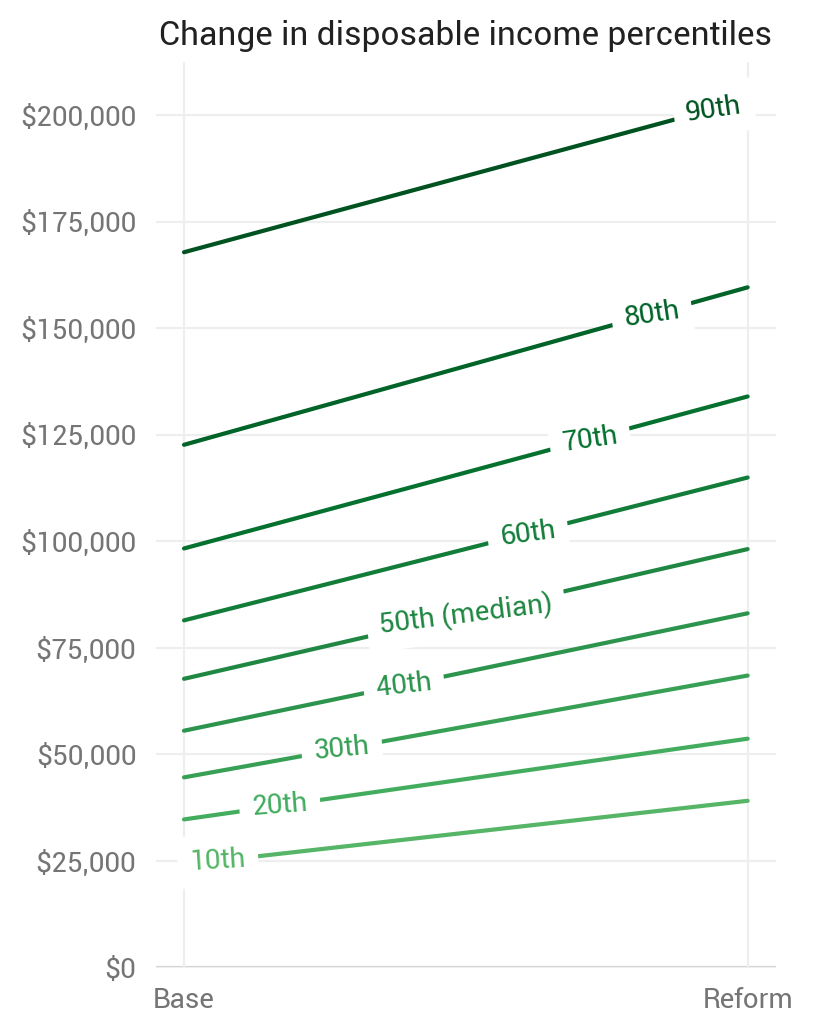

In [5]:
ax = mdf.quantile_chg_plot(base.aftertax_income, reform.aftertax_income,
                           base.XTOT_m, reform.XTOT_m)

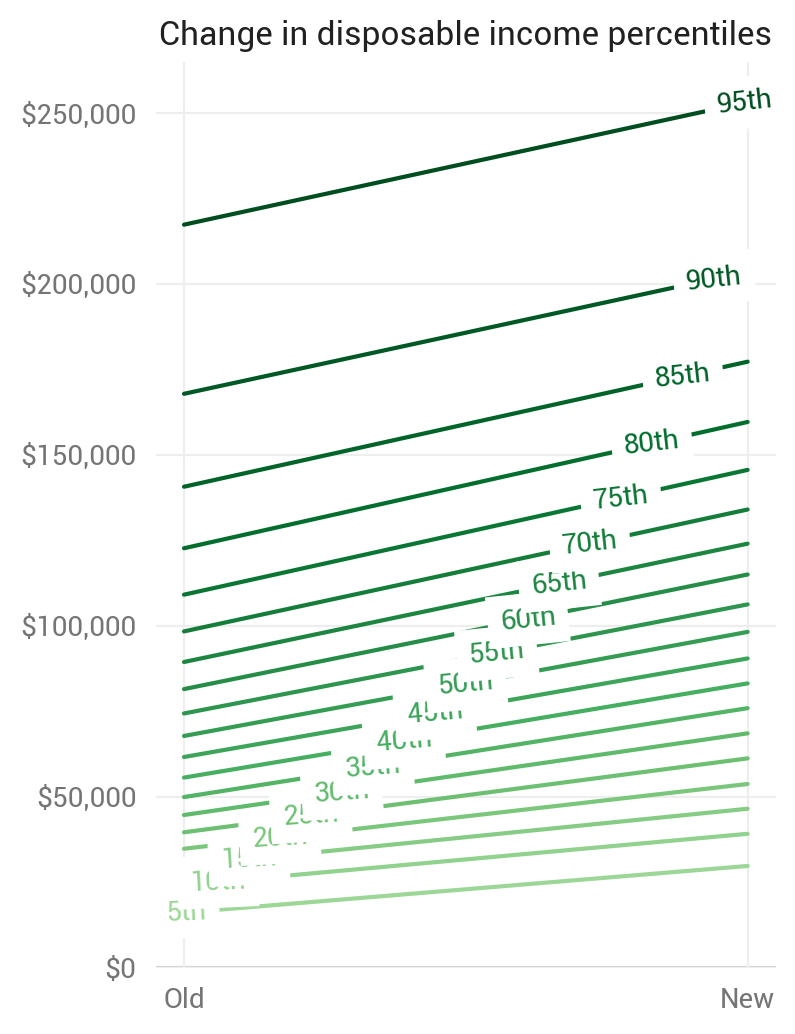

In [6]:
ax = mdf.quantile_chg_plot(base.aftertax_income, reform.aftertax_income,
                           base.XTOT_m, reform.XTOT_m,
                           q=np.arange(0.05, 1, 0.05),
                           label1='Old', label2='New')

In [7]:
ax = mdf.quantile_chg_plot(base.aftertax_income, reform.aftertax_income,
                           base.XTOT_m, reform.XTOT_m,
                           q=np.arange(0.25, 1, 0.25))

IndexError: index 4 is out of bounds for axis 0 with size 3

In [10]:
np.arange(0, 1, 0.1).tolist().index(0.01)

ValueError: 0.01 is not in list